# Zoiberg-2.0 Bootstrap


In [2]:
# Just to make sure my RAM doesn't explode, clears all variables in memory
%reset

## Imports

---


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv('./mnist_train.csv', header=None)
df_test = pd.read_csv('./mnist_test.csv', header=None)

In [5]:
print(f'Train set shape: {df_train.shape}')
print(f'Test set shape: {df_test.shape}')
df_train.head()
# df_test.head()

Train set shape: (60000, 785)
Test set shape: (10000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train = df_train.rename(columns={0: 'digit'})
df_test = df_test.rename(columns={0: 'digit'})

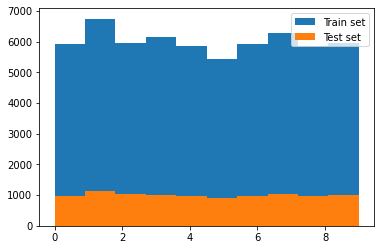

In [7]:
plt.hist(df_train['digit'], label='Train set')
plt.hist(df_test['digit'], label='Test set')
plt.legend()

In [8]:
def show_image(n_image):
    pixels = df_train.drop('digit', axis=1).iloc[n_image].values
    img = np.reshape(pixels, (28, 28))
    plt.imshow(img, cmap='plasma')


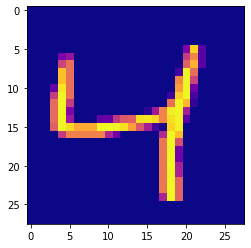

In [21]:
show_image(2)

In [10]:
df_train['digit'].describe()

count    60000.000000
mean         4.453933
std          2.889270
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: digit, dtype: float64

In [11]:
pd.concat([
    df_train['digit'].value_counts().sort_index().rename('Train'),
    df_test['digit'].value_counts().sort_index().rename('Test')
],
          axis=1)


,Train,Test
0,5923,980
1,6742,1135
2,5958,1032
3,6131,1010
4,5842,982
5,5421,892
6,5918,958
7,6265,1028
8,5851,974
9,5949,1009


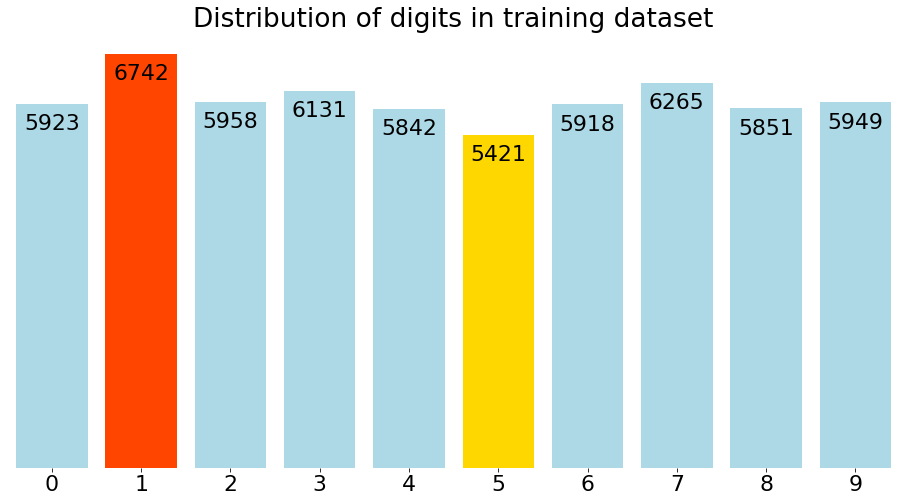

In [12]:
plt.rcParams.update({'font.size': 22})
fig1 = plt.figure(figsize=(16, 8))
hist = sns.countplot(data=df_train, x='digit', saturation=1, color='lightblue')
# you can search color picker in google, and get hex values of you fav color

patch_h = [patch.get_height() for patch in hist.patches]
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)
idx_smallest = np.argmin(patch_h)
# np.argmax return the index of largest value of the list

hist.patches[idx_tallest].set_facecolor('orangered')
hist.patches[idx_smallest].set_facecolor('gold')
hist.bar_label(hist.containers[0], padding=-30)
hist.set_title('Distribution of digits in training dataset')
hist.set_frame_on(False)
hist.get_yaxis().set_visible(False)
hist.set_xlabel('')

plt.rcParams.update({'font.size': 10})


In [13]:
fig1.add_axes(hist)
fig1.savefig('digit_distribution_train_set.png', facecolor='white')

## Predictions

---


In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve, learning_curve

In [35]:
model = KNeighborsClassifier()

In [36]:
y_train = df_train['digit']
X_train = df_train.drop('digit', axis=1)
y_test = df_test['digit']
X_test = df_test.drop('digit', axis=1)

In [37]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
print(f'Train score: {model.score(X_train, y_train)}')
print(f'Test score: {model.score(X_test, y_test)}')

Train score: 0.9819166666666667
Test score: 0.9688


In [46]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

# WARNING: this line takes forever to compile, maybe reduce the sample size to speed up the process ?
train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

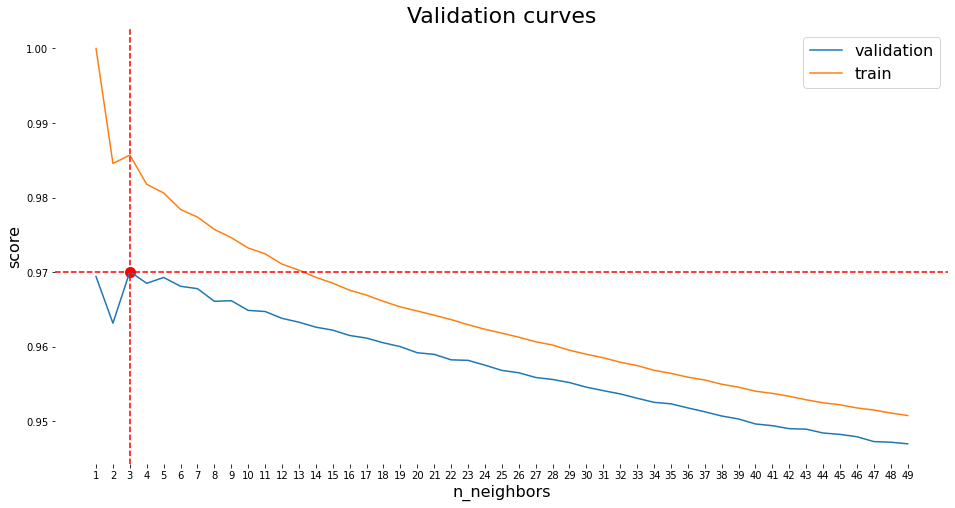

In [100]:
val_score_mean = val_score.mean(axis=1)

plt.figure(figsize=(16, 8))
plt.title('Validation curves', fontsize=22)
plt.box(False)
plt.plot(k, val_score_mean, label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')
plt.axhline(val_score_mean.max(), c='red', linestyle='--')
plt.axvline(val_score_mean.argmax() + 1, c='red', linestyle='--')
plt.scatter(val_score_mean.argmax() + 1, val_score_mean.max(), c='red', linewidths=5)
plt.xticks(k)

plt.xlabel('n_neighbors', fontsize=16)
plt.ylabel('score', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('validation_curves.png', facecolor='white')

In [107]:
model = KNeighborsClassifier(3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9705

In [109]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(.1, 1, 10), cv=5)

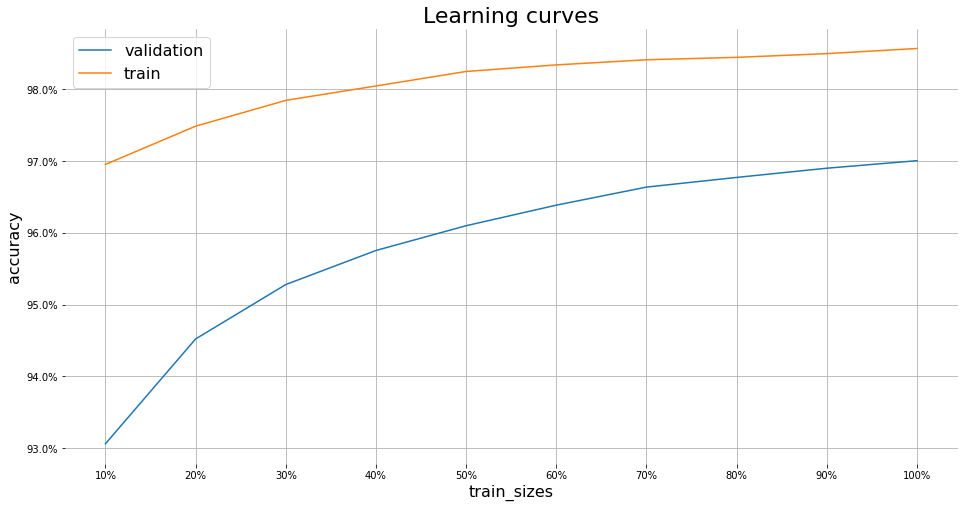

In [143]:
import matplotlib.ticker as mtick

fig = plt.figure(figsize=(16, 8))
ax = plt.subplot()

ax.plot(np.linspace(.1, 1, 10), val_score.mean(axis=1), label='validation')
ax.plot(np.linspace(.1, 1, 10), train_score.mean(axis=1), label='train')

ax.set_title('Learning curves', fontsize=22)
ax.set_xlabel('train_sizes', fontsize=16)
ax.set_ylabel('accuracy', fontsize=16)
ax.set_xticks(np.linspace(.1, 1, 10))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.legend(fontsize=16)

ax.set_frame_on(False)
ax.grid()

fig.savefig('learning_curves.png', facecolor='white')